# Computers games

# Константин Исаев 

Датасет содержит список игр, который продается на игровой площадке Steam. 
Название колонок будет изменено, поэтому можно изначальные не запоминать

In [250]:
import pandas as pd
import numpy as np

In [251]:
steam = pd.read_csv('games-features-edit.csv')
steam

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
0,Counter-Strike,Nov 1 2000,88,68991,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99
1,Team Fortress Classic,Apr 1 1999,0,2439,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
2,Day of Defeat,May 1 2003,79,2319,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
3,Deathmatch Classic,Jun 1 2001,0,888,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
4,Half-Life: Opposing Force,Nov 1 1999,0,2934,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12619,ObserVR Beta,Oct 26 2016,0,0,True,True,False,False,False,False,False,False,False,True,False,False,False,False,0.00
12620,One Night Stand,NaN,0,0,False,False,True,False,False,True,False,False,True,False,False,False,False,False,0.00
12621,Fiber Twig: Midnight Puzzle,Oct 26 2016,0,0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,2.99
12622,Charm Tale Quest,Oct 27 2016,0,0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,2.99


Узнаем сначала есть ли пропущенные строки и какое их количество

In [252]:
steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12624 entries, 0 to 12623
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ResponseName                 12624 non-null  object 
 1   ReleaseDate                  12538 non-null  object 
 2   Metacritic                   12624 non-null  int64  
 3   RecommendationCount          12624 non-null  int64  
 4   IsFree                       12624 non-null  bool   
 5   GenreIsNonGame               12624 non-null  bool   
 6   GenreIsIndie                 12624 non-null  bool   
 7   GenreIsAction                12624 non-null  bool   
 8   GenreIsAdventure             12624 non-null  bool   
 9   GenreIsCasual                12624 non-null  bool   
 10  GenreIsStrategy              12624 non-null  bool   
 11  GenreIsRPG                   12624 non-null  bool   
 12  GenreIsSimulation            12624 non-null  bool   
 13  GenreIsEarlyAcce

Пустые строки встречаются только в Дате Релиза и их не много, поэтому это не будет мешаать анализировать датасет. Давайте перееименуем колонки в более короткие и удобные названия для дальнейшей работы

In [253]:
steam.rename(columns = {'ResponseName' : 'Name',
                        'ReleaseDate' : 'Date',
                       'GenreIsNonGame' : 'NotGame',
                        'RecommendationCount' : 'RecCount',
                       'GenreIsIndie' : 'Indie',
                       'GenreIsAction' : 'Action',
                       'GenreIsAdventure' : 'Adventure',
                        'GenreIsStrategy' : 'Strategy',
                       'GenreIsCasual' : 'Casual',
                       'GenreIsRPG' : 'RPG',
                       'GenreIsSimulation' : 'Simulation',
                       'GenreIsEarlyAccess' : 'EarlyAccess',
                       'GenreIsSports' : 'Sports',
                       'GenreIsFreeToPlay' : 'FreeToPlay',
                       'GenreIsRacing' : 'Racing',
                       'GenreIsMassivelyMultiplayer' : 'Multiplayer',
                       'PriceInitial' : 'Price',}, inplace = True)

In [254]:
steam

,Name,Date,Metacritic,RecCount,IsFree,NotGame,Indie,Action,Adventure,Casual,Strategy,RPG,Simulation,EarlyAccess,FreeToPlay,Sports,Racing,Multiplayer,Price
0,Counter-Strike,Nov 1 2000,88,68991,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99
1,Team Fortress Classic,Apr 1 1999,0,2439,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
2,Day of Defeat,May 1 2003,79,2319,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
3,Deathmatch Classic,Jun 1 2001,0,888,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
4,Half-Life: Opposing Force,Nov 1 1999,0,2934,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12619,ObserVR Beta,Oct 26 2016,0,0,True,True,False,False,False,False,False,False,False,True,False,False,False,False,0.00
12620,One Night Stand,NaN,0,0,False,False,True,False,False,True,False,False,True,False,False,False,False,False,0.00
12621,Fiber Twig: Midnight Puzzle,Oct 26 2016,0,0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,2.99
12622,Charm Tale Quest,Oct 27 2016,0,0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,2.99


Теперь работать с таблицей намного приятее и удобнее. Следующее что мы сделаем, это уберем все НЕ ИГРЫ. Ведь мы хотим работать только с играми. 

In [255]:
steam = steam[steam.IsFree != True]

In [256]:
steam

,Name,Date,Metacritic,RecCount,IsFree,NotGame,Indie,Action,Adventure,Casual,Strategy,RPG,Simulation,EarlyAccess,FreeToPlay,Sports,Racing,Multiplayer,Price
0,Counter-Strike,Nov 1 2000,88,68991,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99
1,Team Fortress Classic,Apr 1 1999,0,2439,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
2,Day of Defeat,May 1 2003,79,2319,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
3,Deathmatch Classic,Jun 1 2001,0,888,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
4,Half-Life: Opposing Force,Nov 1 1999,0,2934,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12618,VR RunningJoe,Oct 31 2016,0,0,False,False,False,False,False,True,False,False,False,False,False,False,True,False,0.00
12620,One Night Stand,NaN,0,0,False,False,True,False,False,True,False,False,True,False,False,False,False,False,0.00
12621,Fiber Twig: Midnight Puzzle,Oct 26 2016,0,0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,2.99
12622,Charm Tale Quest,Oct 27 2016,0,0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,2.99


Теперь мы имеем в ДатаФрейме только Игры и колонка NotGame нам не нужна. Давайте ее удалим

In [257]:
del steam['NotGame']
steam

,Name,Date,Metacritic,RecCount,IsFree,Indie,Action,Adventure,Casual,Strategy,RPG,Simulation,EarlyAccess,FreeToPlay,Sports,Racing,Multiplayer,Price
0,Counter-Strike,Nov 1 2000,88,68991,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99
1,Team Fortress Classic,Apr 1 1999,0,2439,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
2,Day of Defeat,May 1 2003,79,2319,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
3,Deathmatch Classic,Jun 1 2001,0,888,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
4,Half-Life: Opposing Force,Nov 1 1999,0,2934,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12618,VR RunningJoe,Oct 31 2016,0,0,False,False,False,False,True,False,False,False,False,False,False,True,False,0.00
12620,One Night Stand,NaN,0,0,False,True,False,False,True,False,False,True,False,False,False,False,False,0.00
12621,Fiber Twig: Midnight Puzzle,Oct 26 2016,0,0,False,True,False,False,True,False,False,False,False,False,False,False,False,2.99
12622,Charm Tale Quest,Oct 27 2016,0,0,False,True,False,False,True,False,False,False,False,False,False,False,False,2.99


Давайте создадим новую категорию для игр, где в зависимости от оценки будет показывается ее оценка критиками.

In [269]:
def get_M_cat(Metacritic):
    if Metacritic == 0:
        return 'No score'
    if Metacritic < 20:
        return 'Disgusting'
    elif Metacritic < 40:
        return 'Awful'
    elif Metacritic < 60:
        return 'Normal'
    elif Metacritic < 80:
        return 'Good'
    elif Metacritic < 100:
        return 'Great'
    else:
        return Metacritic

In [270]:
steam['grade']= steam['Metacritic'].apply(get_M_cat)

/var/folders/3m/81jjhh0d72jgncwgmcbrvxr80000gn/T/ipykernel_13067/1109583574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steam['grade']= steam['Metacritic'].apply(get_M_cat)


In [271]:
steam

,Name,Date,Metacritic,RecCount,IsFree,Indie,Action,Adventure,Casual,Strategy,RPG,Simulation,EarlyAccess,FreeToPlay,Sports,Racing,Multiplayer,Price,grade
0,Counter-Strike,Nov 1 2000,88,68991,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99,Great
1,Team Fortress Classic,Apr 1 1999,0,2439,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99,No score
2,Day of Defeat,May 1 2003,79,2319,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99,Good
3,Deathmatch Classic,Jun 1 2001,0,888,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99,No score
4,Half-Life: Opposing Force,Nov 1 1999,0,2934,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99,No score
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12618,VR RunningJoe,Oct 31 2016,0,0,False,False,False,False,True,False,False,False,False,False,False,True,False,0.00,No score
12620,One Night Stand,NaN,0,0,False,True,False,False,True,False,False,True,False,False,False,False,False,0.00,No score
12621,Fiber Twig: Midnight Puzzle,Oct 26 2016,0,0,False,True,False,False,True,False,False,False,False,False,False,False,False,2.99,No score
12622,Charm Tale Quest,Oct 27 2016,0,0,False,True,False,False,True,False,False,False,False,False,False,False,False,2.99,No score


Давайте узнаем сколько игр в каждой категории

In [282]:
steam ['grade'].value_counts()

No score    9473
Good        1285
Great        601
Normal       270
Awful         22
Name: grade, dtype: int64

Как мы видим у нас очень много игр без оценки, это будет нам мешать в будущем. Поэтому давайте создадим другой датасет, где не будет игр без оценки. Он нам потребуется для визуализации

In [274]:
steam0 = steam[steam.Metacritic != 0]

In [275]:
steam0

,Name,Date,Metacritic,RecCount,IsFree,Indie,Action,Adventure,Casual,Strategy,RPG,Simulation,EarlyAccess,FreeToPlay,Sports,Racing,Multiplayer,Price,grade
0,Counter-Strike,Nov 1 2000,88,68991,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99,Great
2,Day of Defeat,May 1 2003,79,2319,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99,Good
6,Half-Life,Nov 8 1998,96,12486,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99,Great
7,Counter-Strike: Condition Zero,Mar 1 2004,65,7067,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99,Good
8,Counter-Strike: Condition Zero,Mar 1 2004,65,7067,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11782,Pro Evolution Soccer 2017,Sep 14 2016,69,1057,False,False,False,False,False,False,False,False,False,False,True,False,False,39.99,Good
12040,Sid Meiers Civilization(r) VI,Oct 20 2016,94,7201,False,False,False,False,False,True,False,False,False,False,False,False,False,59.99,Great
12049,Mafia III,Oct 6 2016,61,13524,False,False,True,True,False,False,False,False,False,False,False,False,False,59.99,Good
12065,Clustertruck,Sep 27 2016,77,1231,False,True,True,False,False,False,False,False,False,False,False,False,False,14.99,Good


Теперь как мы видем у нас нет в этом ДатаСете игр без оценки критиков

In [283]:
steam0 ['grade'].value_counts()

Good      1285
Great      601
Normal     270
Awful       22
Name: grade, dtype: int64

Так как мы живем в России, то мы не можем покупать игры. Давайте узнаем какое количество бесплатных игры есть в каждой категории

In [264]:
steam0.groupby('grade')['IsFree'].value_counts().unstack()

IsFree,False
grade,
Awful,22
Good,1285
Great,601
Normal,270


Что ж, хороша новость! Большенство бесплатных игр находится в категории хороших игр - рекомендуемых критиками! Правда немног оне понятно, какую часть от всей категории занимают бесплатные игры. Для этог омы построим визуализацию

<AxesSubplot:xlabel='grade'>

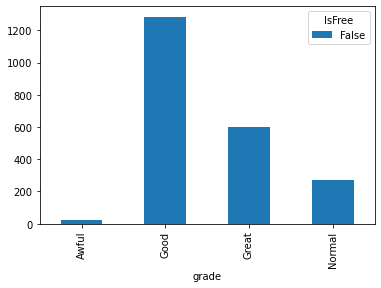

In [287]:
steam0.groupby('grade')['IsFree'].value_counts().unstack().plot(kind = 'bar')

Мне очень нравятся игры Стратегии, поэтому давайте найдем отличную игру из этого жанра.